In [2]:
import pandas as pd
import matplotlib.pyplot as plt

i = 7
path = f'outputs/agents_2/items_{i}/gpt4o/persona_based0/envy_output.csv'
df = pd.read_csv(path)
# get the last column 
envy = df.iloc[:,-2]

# get percent of True
percent = envy.value_counts(normalize=True)[True]
print(f'Items {i}: {percent:.2f}')

Items 7: 0.70


Items 3: 0.41
Items 4: 0.51
Items 5: 0.69
Items 6: 0.68
Items 7: 0.60
Items 8: 0.70
Items 9: 0.71
Items 4: 0.17
Items 5: 0.14
Items 6: 0.30
Items 7: 0.31
Items 8: 0.34
Items 9: 0.35
Items 5: 0.05
Items 6: 0.03
Items 7: 0.05
Items 8: 0.14
Items 9: 0.13
Items 6: 0.02
Items 7: 0.01
Items 8: 0.01
Items 9: 0.01
Items 7: 0.01
Items 8: 0.00
Items 9: 0.00
Items 8: 0.00
Items 9: 0.00
Items 9: 0.00
[0.41, 0.51, 0.69, 0.68, 0.6, 0.7, 0.71]


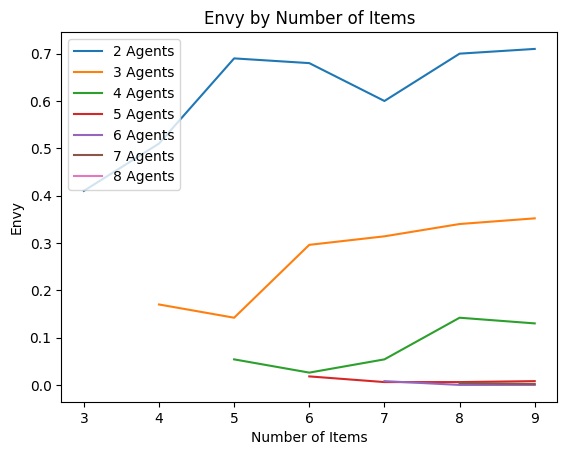

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# loop through configs
items_ag2 = []

for i in range(3, 10):
    # load csv
    path = f'outputs/agents_2/items_{i}/gpt4o/zero_shot0/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    envy = df.iloc[:,-1]

    # get percent of True
    percent = envy.value_counts(normalize=True)[True]
    print(f'Items {i}: {percent:.2f}')

    items_ag2.append(percent)


items_ag3 = []

for i in range(4, 10):
    # load csv
    path = f'outputs/agents_3/items_{i}/gpt4o/zero_shot1/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    envy = df.iloc[:,-1]

    # get percent of True
    percent = envy.value_counts(normalize=True)[True]
    print(f'Items {i}: {percent:.2f}')

    items_ag3.append(percent)


items_ag4 = []

for i in range(5, 10):
    # load csv
    path = f'outputs/agents_4/items_{i}/gpt4o/zero_shot1/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    envy = df.iloc[:,-1]

    # get percent of True
    percent = envy.value_counts(normalize=True)[True]
    print(f'Items {i}: {percent:.2f}')

    items_ag4.append(percent)

items_ag5 = []

for i in range(6, 10):
    # load csv
    path = f'outputs/agents_5/items_{i}/gpt4o/zero_shot3/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    envy = df.iloc[:,-1]

    # get percent of True
    percent = envy.value_counts(normalize=True)[True]
    print(f'Items {i}: {percent:.2f}')

    items_ag5.append(percent)

items_ag6 = []

for i in range(7, 10):
    # load csv
    path = f'outputs/agents_6/items_{i}/gpt4o/zero_shot4/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    envy = df.iloc[:,-1]

    # get percent of True
    try:
        percent = envy.value_counts(normalize=True)[True]
    except KeyError:
        percent = 0
    print(f'Items {i}: {percent:.2f}')

    items_ag6.append(percent)

items_ag7 = []

for i in range(8, 10):
    # load csv
    path = f'outputs/agents_7/items_{i}/gpt4o/zero_shot5/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    envy = df.iloc[:,-1]

    # get percent of True
    percent = envy.value_counts(normalize=True)[True]
    print(f'Items {i}: {percent:.2f}')

    items_ag7.append(percent)

items_ag8 = []

for i in range(9, 10):
    # load csv
    path = f'outputs/agents_8/items_{i}/gpt4o/zero_shot6/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    envy = df.iloc[:,-1]

    # get percent of True
    percent = envy.value_counts(normalize=True)[True]
    print(f'Items {i}: {percent:.2f}')

    items_ag8.append(percent)


print(items_ag2)
# create line plot
plt.plot(range(3, 10), items_ag2, label='2 Agents')
plt.plot(range(4, 10), items_ag3, label='3 Agents')
plt.plot(range(5, 10), items_ag4, label='4 Agents')
plt.plot(range(6, 10), items_ag5, label='5 Agents')
plt.plot(range(7, 10), items_ag6, label='6 Agents')
plt.plot(range(8, 10), items_ag7, label='7 Agents')
plt.plot(range(9, 10), items_ag8, label='8 Agents')
plt.legend()
plt.xlabel('Number of Items')
plt.ylabel('Envy')
plt.title('Envy by Number of Items')
plt.show()



Items 3: Proportion of LLM Nash Welfare: 0.86, Proportion of LLM Egalitarian Welfare: 0.75, Proportion of LLM Utilitarian Welfare: 0.95
Items 4: Proportion of LLM Nash Welfare: 0.88, Proportion of LLM Egalitarian Welfare: 0.81, Proportion of LLM Utilitarian Welfare: 0.94
Items 5: Proportion of LLM Nash Welfare: 0.93, Proportion of LLM Egalitarian Welfare: 0.83, Proportion of LLM Utilitarian Welfare: 0.96
Items 6: Proportion of LLM Nash Welfare: 0.89, Proportion of LLM Egalitarian Welfare: 0.84, Proportion of LLM Utilitarian Welfare: 0.93
Items 7: Proportion of LLM Nash Welfare: 0.85, Proportion of LLM Egalitarian Welfare: 0.76, Proportion of LLM Utilitarian Welfare: 0.94
Items 8: Proportion of LLM Nash Welfare: 0.89, Proportion of LLM Egalitarian Welfare: 0.82, Proportion of LLM Utilitarian Welfare: 0.95
Items 9: Proportion of LLM Nash Welfare: 0.91, Proportion of LLM Egalitarian Welfare: 0.84, Proportion of LLM Utilitarian Welfare: 0.95
[]


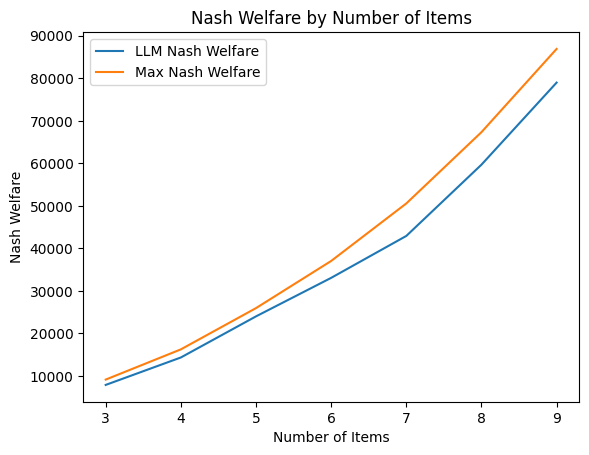

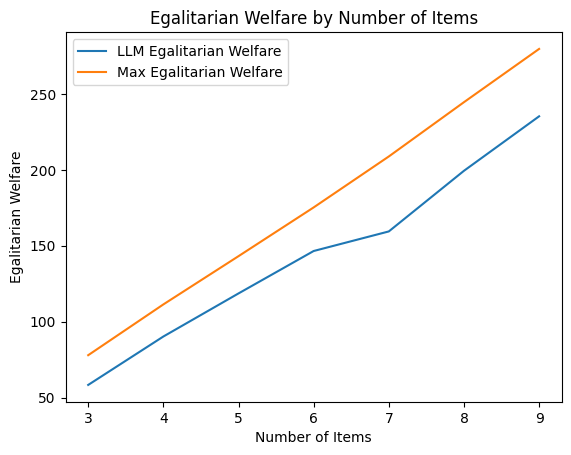

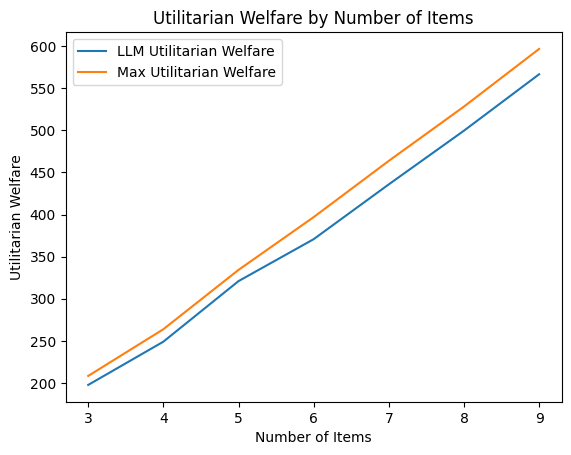

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# # loop through configs
items_ag2 = []

llm_nws = []
max_nws = []
llm_ews = []
max_ews = []
llm_uws = []
max_uws = []

for i in range(3, 10):
    # load csv
    path = f'outputs/agents_2/items_{i}/gpt4o/zero_shot0/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    llm_nash_welfare = df['LLM_Nash_Welfare']

    max_nash_welfare = df['Max_Nash_Welfare']

    llm_egaliarian_welfare = df['LLM_Egalitarian_Welfare']
    max_egalitarian_welfare = df['Max_Egalitarian_Welfare']

    llm_utilitarian_welfare = df['LLM_Utilitarian_Welfare']
    max_utilitarian_welfare = df['Max_Utilitarian_Welfare']

    # append average to list
    llm_nws.append(llm_nash_welfare.mean())
    max_nws.append(max_nash_welfare.mean())
    llm_ews.append(llm_egaliarian_welfare.mean())
    max_ews.append(max_egalitarian_welfare.mean())
    llm_uws.append(llm_utilitarian_welfare.mean())
    max_uws.append(max_utilitarian_welfare.mean())

    # get proportions of welfare
    llm_nws_prop = llm_nash_welfare.mean() / max_nash_welfare.mean()
    llm_ews_prop = llm_egaliarian_welfare.mean() / max_egalitarian_welfare.mean()
    llm_uws_prop = llm_utilitarian_welfare.mean() / max_utilitarian_welfare.mean()

    print(f'Items {i}: Proportion of LLM Nash Welfare: {llm_nws_prop:.2f}, Proportion of LLM Egalitarian Welfare: {llm_ews_prop:.2f}, Proportion of LLM Utilitarian Welfare: {llm_uws_prop:.2f}')

    # items_ag2.append(percent)


# items_ag3 = []

# for i in range(4, 10):
#     # load csv
#     path = f'outputs/agents_3/items_{i}/gpt4o/zero_shot1/envy_output.csv'
#     df = pd.read_csv(path)
#     # get the last column 
#     envy = df.iloc[:,-1]

#     # get percent of True
#     percent = envy.value_counts(normalize=True)[True]
#     print(f'Items {i}: {percent:.2f}')

#     items_ag3.append(percent)


# items_ag4 = []

# for i in range(5, 10):
#     # load csv
#     path = f'outputs/agents_4/items_{i}/gpt4o/zero_shot1/envy_output.csv'
#     df = pd.read_csv(path)
#     # get the last column 
#     envy = df.iloc[:,-1]

#     # get percent of True
#     percent = envy.value_counts(normalize=True)[True]
#     print(f'Items {i}: {percent:.2f}')

#     items_ag4.append(percent)

# items_ag5 = []

# for i in range(6, 10):
#     # load csv
#     path = f'outputs/agents_5/items_{i}/gpt4o/zero_shot3/envy_output.csv'
#     df = pd.read_csv(path)
#     # get the last column 
#     envy = df.iloc[:,-1]

#     # get percent of True
#     percent = envy.value_counts(normalize=True)[True]
#     print(f'Items {i}: {percent:.2f}')

#     items_ag5.append(percent)

# items_ag6 = []

# for i in range(7, 10):
#     # load csv
#     path = f'outputs/agents_6/items_{i}/gpt4o/zero_shot4/envy_output.csv'
#     df = pd.read_csv(path)
#     # get the last column 
#     envy = df.iloc[:,-1]

#     # get percent of True
#     try:
#         percent = envy.value_counts(normalize=True)[True]
#     except KeyError:
#         percent = 0
#     print(f'Items {i}: {percent:.2f}')

#     items_ag6.append(percent)

# items_ag7 = []

# for i in range(8, 10):
#     # load csv
#     path = f'outputs/agents_7/items_{i}/gpt4o/zero_shot5/envy_output.csv'
#     df = pd.read_csv(path)
#     # get the last column 
#     envy = df.iloc[:,-1]

#     # get percent of True
#     percent = envy.value_counts(normalize=True)[True]
#     print(f'Items {i}: {percent:.2f}')

#     items_ag7.append(percent)

# items_ag8 = []

# for i in range(9, 10):
#     # load csv
#     path = f'outputs/agents_8/items_{i}/gpt4o/zero_shot6/envy_output.csv'
#     df = pd.read_csv(path)
#     # get the last column 
#     envy = df.iloc[:,-1]

#     # get percent of True
#     percent = envy.value_counts(normalize=True)[True]
#     print(f'Items {i}: {percent:.2f}')

#     items_ag8.append(percent)


print(items_ag2)
# create line plot
plt.plot(range(3, 10), llm_nws, label='LLM Nash Welfare')
plt.plot(range(3, 10), max_nws, label='Max Nash Welfare')
plt.xlabel('Number of Items')
plt.ylabel('Nash Welfare')
plt.title('Nash Welfare by Number of Items')
plt.legend()
plt.show()
plt.plot(range(3, 10), llm_ews, label='LLM Egalitarian Welfare')
plt.plot(range(3, 10), max_ews, label='Max Egalitarian Welfare')
plt.legend()
plt.xlabel('Number of Items')
plt.ylabel('Egalitarian Welfare')
plt.title('Egalitarian Welfare by Number of Items')
plt.show()
plt.plot(range(3, 10), llm_uws, label='LLM Utilitarian Welfare')
plt.plot(range(3, 10), max_uws, label='Max Utilitarian Welfare')
plt.legend()
plt.xlabel('Number of Items')
plt.ylabel('Utilitarian Welfare')
plt.title('Utilitarian Welfare by Number of Items')
plt.show()
import pandas as pd



In [9]:
items_ag6 = []

for i in range(7, 10):
    # load csv
    path = f'outputs/agents_6/items_{i}/gpt4o/zero_shot4/envy_output.csv'
    df = pd.read_csv(path)
    # get the last column 
    envy = df.iloc[:,-1]

    # get percent of True
    percent = envy.value_counts(normalize=True)[True]
    print(f'Items {i}: {percent:.2f}')

    items_ag6.append(percent)

Items 7: 0.01


KeyError: True